In [69]:
import os
import gc
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
#import plotly.offline as px
from plotly.offline import plot
import plotly.graph_objects as go
%matplotlib inline
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LogisticRegression as log
# from sklearn.model_selection import train_test_split as split 
# from sklearn.model_selection import GridSearchCV as Grid
# from sklearn.naive_bayes import GaussianNB as GNB
# from sklearn.svm import SVC
# from sklearn.linear_model import LinearRegression as linear
# from sklearn.linear_model import SGDClassifier as SGD
# import xgboost as xgb
# from sklearn.decomposition import IncrementalPCA as ipca
# from sklearn.metrics import (roc_auc_score, precision_score, recall_score, f1_score,
#                              confusion_matrix, accuracy_score, roc_curve, auc)

In [66]:
!pip install plotly_express



'$' is not recognized as an internal or external command,
operable program or batch file.


In [28]:
df = pd.read_csv('C:/Users/Ikmal Syafiq/Downloads/jane-street-market-prediction/train.csv')

In [5]:
pd.set_option('display.max_columns', 140)

In [6]:
org_len = len(df)
df.head(5)

date     weight    resp_1    resp_2    resp_3    resp_4      resp  \
0     0   0.000000  0.009916  0.014079  0.008773  0.001390  0.006270   
1     0  16.673515 -0.002828 -0.003226 -0.007319 -0.011114 -0.009792   
2     0   0.000000  0.025134  0.027607  0.033406  0.034380  0.023970   
3     0   0.000000 -0.004730 -0.003273 -0.000461 -0.000476 -0.003200   
4     0   0.138531  0.001252  0.002165 -0.001215 -0.006219 -0.002604   

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          1  -1.872746  -2.191242  -0.474163  -0.323046   0.014688   
1         -1  -1.349537  -1.704709   0.068058   0.028432   0.193794   
2         -1   0.812780  -0.256156   0.806463   0.400221  -0.614188   
3         -1   1.174378   0.344640   0.066872   0.009357  -1.006373   
4          1  -3.172026  -3.093182  -0.161518  -0.128149  -0.195006   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0  -0.002484        NaN        NaN  -0.989982   -1.055090         NaN   
1   0.138212        NaN        NaN  -0.151877   -0.384952         NaN   
2  -0.354800        NaN        NaN   5.448261    2.668029         NaN   
3  -0.676458        NaN        NaN   4.508206    2.484260         NaN   
4  -0.143780        NaN        NaN   2.683018    1.450991         NaN   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0         NaN   -2.667671   -2.001475   -1.703595   -2.196892         NaN   
1         NaN    1.225838    0.789076    1.110580    1.102281         NaN   
2         NaN    3.836342    2.183258    3.902698    3.045431         NaN   
3         NaN    2.902176    1.799163    3.192700    2.848359         NaN   
4         NaN    1.257761    0.632336    0.905204    0.575275         NaN   

   feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
0         NaN    1.483295    1.307466         NaN         NaN    1.175200   
1         NaN   -0.590600   -0.625682         NaN         NaN   -0.543425   
2         NaN   -1.141082   -0.979962         NaN         NaN   -1.157585   
3         NaN   -1.401637   -1.428248         NaN         NaN   -1.421175   
4         NaN    2.550883    2.484082         NaN         NaN    2.502828   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0    0.967805    1.608410    1.319365         NaN         NaN   -0.515073   
1   -0.547486   -0.706600   -0.667806         NaN         NaN    0.910558   
2   -0.966803   -1.430973   -1.103432         NaN         NaN    5.131559   
3   -1.487976   -1.756415   -1.647543         NaN         NaN    4.766182   
4    2.606440    2.731251    2.566561         NaN         NaN   -1.477905   

   feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
0   -0.448988         NaN         NaN   -2.429812   -2.206423   -3.593120   
1    0.914465         NaN         NaN    2.137454    2.080459    2.819291   
2    4.314714         NaN         NaN    4.226341    3.173640    5.991513   
3    4.528353         NaN         NaN    3.330068    2.778468    5.603940   
4   -1.722451         NaN         NaN   -1.191981   -1.037629   -2.237275   

   feature_36  feature_37  feature_38  feature_39  feature_40  feature_41  \
0   -2.868358    0.112697    0.053157   -0.539956   -0.692187    3.491282   
1    2.483965   -0.086755   -0.082687    0.368431    0.469196    5.711996   
2    4.142298   -0.167927   -0.124778    0.749326    0.715824   -0.039007   
3    4.343171   -0.203161   -0.177835    0.642206    0.694692   -0.607811   
4   -1.740456    0.326904    0.221809   -0.187586   -0.272907    0.870839   

   feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
0   -1.684889    1.337123   -0.328607    1.689207   -1.052243   -1.870885   
1   -2.215132    0.796703   -1.140081    0.716617   -0.059431   -0.198920   
2    0.186321    2.323887    0.162261    0.237987   -0.350221   -0.138033   
3    2.718151    1.656999    0.192241   -0.622152   -0.024920    0.868425   
4   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 2.5 GB


In [8]:
df.feature_0 = df.feature_0.astype(np.int8)
df.date= df.date.astype(np.int16)
df.ts_id = df.ts_id.astype(np.int32)

In [9]:
for i in df:
    if df[i].dtype == np.float64:
        if (((df[i] < .0001) & (df[i] > -.0001)).mean()) > .001:
            print(i)

weight
resp_1
resp_2
resp_3
resp_4
resp


In [10]:
for i in df:
    if df[i].dtype == np.float64:
        if (((df[i] < .0001) & (df[i] > -.0001)).mean()) < .001:
            df[i] = df[i].astype(np.float32)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2390491 entries, 0 to 2390490
Columns: 139 entries, date to action
dtypes: float32(129), float64(6), int16(1), int32(1), int8(2)
memory usage: 1.3 GB


In [12]:
df.sort_values(by= ['date','ts_id'],inplace=True)

In [13]:
df['action'] = np.where(df['resp'] > 0,1,0)
df.action = df.action.astype(np.int8)

In [90]:
df.head(10)

date     weight    resp_1    resp_2    resp_3    resp_4      resp  \
0     0   0.000000  0.009916  0.014079  0.008773  0.001390  0.006270   
1     0  16.673515 -0.002828 -0.003226 -0.007319 -0.011114 -0.009792   
2     0   0.000000  0.025134  0.027607  0.033406  0.034380  0.023970   
3     0   0.000000 -0.004730 -0.003273 -0.000461 -0.000476 -0.003200   
4     0   0.138531  0.001252  0.002165 -0.001215 -0.006219 -0.002604   
5     0   0.000000 -0.001047 -0.002700  0.000743  0.004667  0.001282   
6     0   0.190575 -0.001939 -0.002301  0.001088  0.005963  0.000709   
7     0   3.820844  0.017395  0.021361  0.031163  0.036970  0.033473   
8     0   0.116557 -0.005460 -0.007301 -0.009085 -0.003546 -0.001677   
9     0   0.160117  0.005976  0.004345  0.023712  0.035360  0.020317   

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          1  -1.872746  -2.191242  -0.474163  -0.323046   0.014688   
1         -1  -1.349537  -1.704709   0.068058   0.028432   0.193794   
2         -1   0.812780  -0.256156   0.806463   0.400221  -0.614188   
3         -1   1.174378   0.344640   0.066872   0.009357  -1.006373   
4          1  -3.172026  -3.093182  -0.161518  -0.128149  -0.195006   
5         -1  -1.499681  -1.928023   0.008089  -0.019485   0.120054   
6         -1  -3.172026  -3.093182  -0.030588  -0.043175   0.097058   
7         -1   0.446050  -0.466210   0.498751   0.244116   0.412528   
8          1  -3.172026  -3.093182  -0.363836  -0.291496   0.128422   
9          1   2.744408   1.412127  -0.250801  -0.161357   0.014279   

   feature_6  feature_9  feature_10  feature_11  feature_12  feature_13  \
0  -0.002484  -0.989982   -1.055090         NaN         NaN   -2.667671   
1   0.138212  -0.151877   -0.384952         NaN         NaN    1.225838   
2  -0.354800   5.448261    2.668029         NaN         NaN    3.836342   
3  -0.676458   4.508206    2.484260         NaN         NaN    2.902176   
4  -0.143780   2.683018    1.450991         NaN         NaN    1.257761   
5   0.069097  -5.942414   -3.930552         NaN         NaN   -3.261775   
6   0.053483  -6.299415   -4.202503         NaN         NaN   -3.490652   
7   0.224140   0.277257   -0.458632         NaN         NaN    2.637622   
8   0.096168  -3.727364   -2.451716         NaN         NaN   -2.825845   
9  -0.008666   0.711444   -0.278608         NaN         NaN   -0.006790   

   feature_14  feature_15  feature_16  feature_19  feature_20  feature_21  \
0   -2.001475   -1.703595   -2.196892    1.483295    1.307466         NaN   
1    0.789076    1.110580    1.102281   -0.590600   -0.625682         NaN   
2    2.183258    3.902698    3.045431   -1.141082   -0.979962         NaN   
3    1.799163    3.192700    2.848359   -1.401637   -1.428248         NaN   
4    0.632336    0.905204    0.575275    2.550883    2.484082         NaN   
5   -2.489635   -3.273026   -3.792078   -3.539967   -3.840927         NaN   
6   -2.675391   -3.568659   -4.095882   -3.848427   -4.144813         NaN   
7    1.432136    1.374071    0.724772   -2.016985   -1.997592         NaN   
8   -2.304248   -2.534000   -3.179482    0.004298   -0.056330         NaN   
9   -0.530912   -1.750933   -2.208982    2.126512    1.556979         NaN   

   feature_22  feature_23  feature_24  feature_25  feature_26  feature_29  \
0         NaN    1.175200    0.967805    1.608410    1.319365   -0.515073   
1         NaN   -0.543425   -0.547486   -0.706600   -0.667806    0.910558   
2         NaN   -1.157585   -0.966803   -1.430973   -1.103432    5.131559   
3         NaN   -1.421175   -1.487976   -1.756415   -1.647543    4.766182   
4         NaN    2.502828    2.606440    2.731251    2.566561   -1.477905   
5         NaN   -3.549386   -4.091681   -4.059668   -4.212724    0.667160   
6         NaN   -3.756330   -4.310800   -4.363503   -4.510323    0.206028   
7         NaN   -1.974451   -2.079689   -2.479893   -2.305350    1.161571   
8         NaN   -0.011601   -0.053375   -0.001363   -0.059892

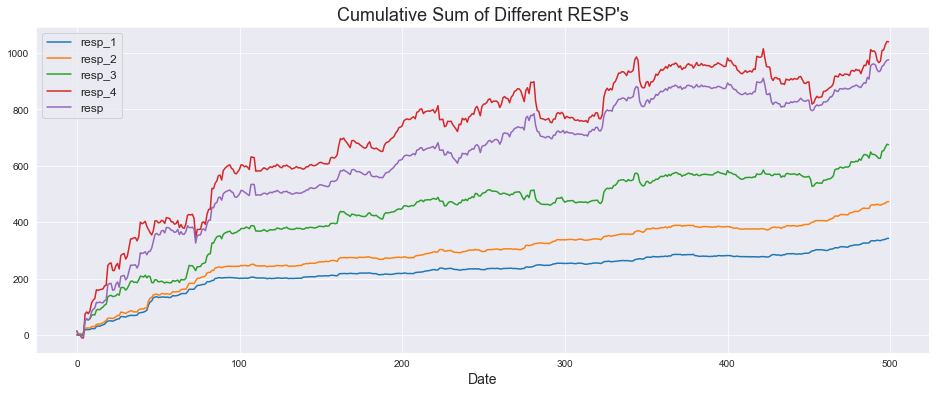

In [20]:
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(1,1,1)
df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']].sum().cumsum().plot(ax=ax)
plt.title('Cumulative Sum of Different RESP\'s',fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.legend(fontsize=12);

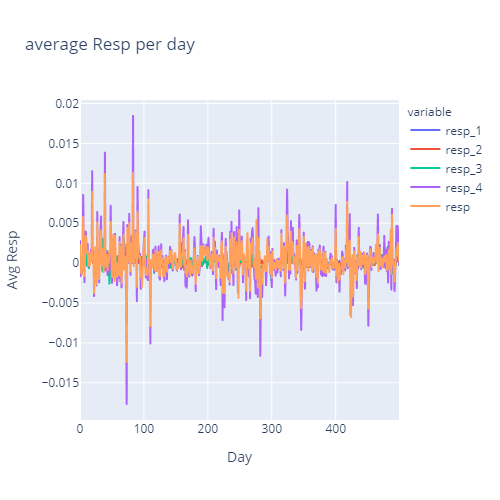

In [74]:
fig = px.line(df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4','resp']].mean(),
              x= df.groupby('date')[['resp_1', 'resp_2', 'resp_3', 'resp_4','resp']].mean().index,
              y= ['resp_1', 'resp_2', 'resp_3', 'resp_4','resp'],
              title= '\naverage Resp per day', height=500, width=1000)
fig.layout.xaxis.title = 'Day' 
fig.layout.yaxis.title = 'Avg Resp'
fig.show()
#fig.write_html('figurel', auto_open=True)

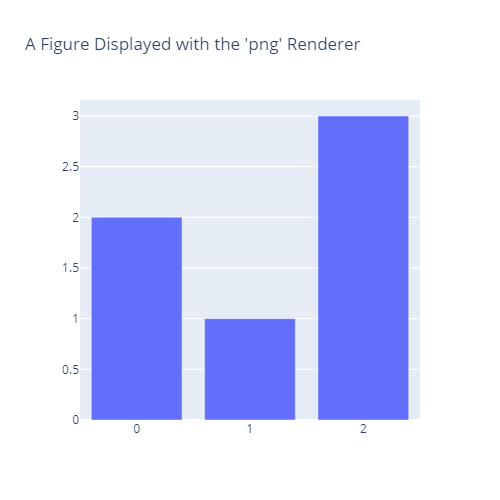

In [73]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500

pio.renderers.default = "png"

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'png' Renderer"
)
fig.show()

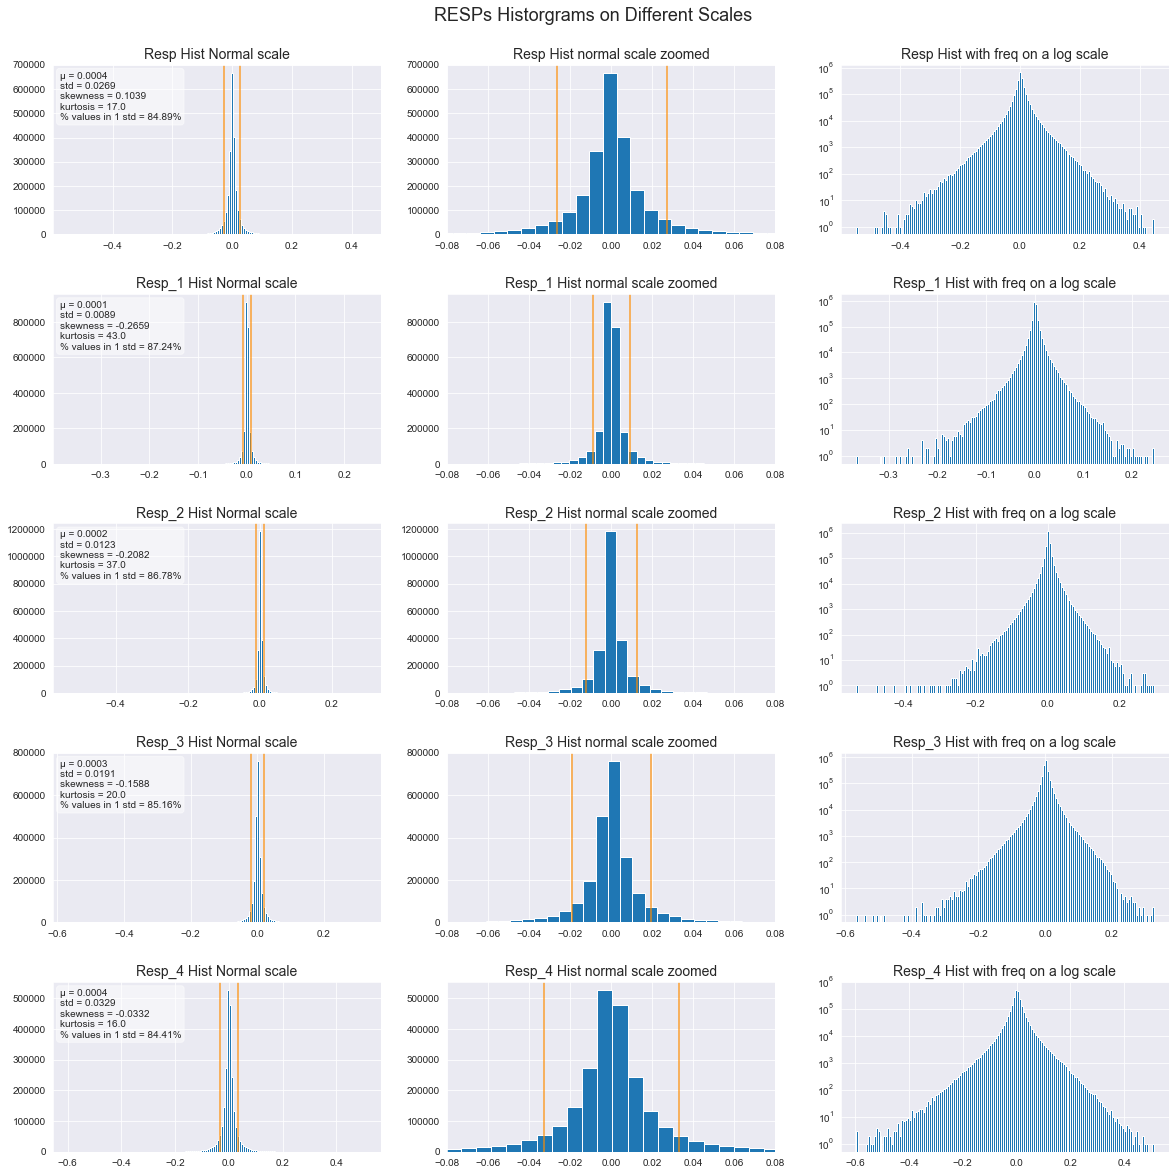

In [22]:
fig,((ax11,ax12,ax13),(ax21,ax22,ax23),(ax31,ax32,ax33),(ax41,ax42,ax43),(ax51,ax52,ax53)) = plt.subplots(5,3,figsize=(20,20))
plt.subplots_adjust(hspace=0.35)
ax11.hist(df.resp,bins=150)
ax11.axvline(df.resp.mean()+df.resp.std(),color='darkorange',alpha=.8)
ax11.axvline(df.resp.mean()-df.resp.std(),color='darkorange',alpha=.8)
df.resp.plot.hist(bins= 150,ax=ax12)
ax12.axvline(df.resp.mean()+df.resp.std(),color='darkorange',alpha=.8)
ax12.axvline(df.resp.mean()-df.resp.std(),color='darkorange',alpha=.8)
ax12.set_xlim(-.08,.08)
ax13.hist(df.resp,bins=150)
ax13.set_yscale('log')
skew= round(df.resp.skew(),4)
kurt= round(df.resp.kurtosis())
std1= round((((df.resp.mean()-df.resp.std()) < df.resp ) & (df.resp < (df.resp.mean()+df.resp.std()))).mean()*100,2)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax11.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp.mean(),4),round(df.resp.std(),4),skew,kurt,std1),
         transform=ax11.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax11.set_title('Resp Hist Normal scale',fontsize=14)
ax12.set_title('Resp Hist normal scale zoomed',fontsize=14)
ax13.set_title('Resp Hist with freq on a log scale',fontsize=14);
ax11.set_xlabel('')
ax11.set_ylabel('')
ax12.set_xlabel('')
ax12.set_ylabel('')
ax13.set_xlabel('')
ax13.set_ylabel('')
ax21.hist(df.resp_1,bins=150)
ax21.axvline(df.resp_1.mean()+df.resp_1.std(),color='darkorange',alpha=.8)
ax21.axvline(df.resp_1.mean()-df.resp_1.std(),color='darkorange',alpha=.8)
df.resp_1.plot.hist(bins= 150,ax=ax22)
ax22.axvline(df.resp_1.mean()+df.resp_1.std(),color='darkorange',alpha=.8)
ax22.axvline(df.resp_1.mean()-df.resp_1.std(),color='darkorange',alpha=.8)
ax22.set_xlim(-.08,.08)
ax23.hist(df.resp_1,bins=150)
ax23.set_yscale('log')
skew= round(df.resp_1.skew(),4)
kurt= round(df.resp_1.kurtosis())
std1= round((((df.resp_1.mean()-df.resp_1.std()) < df.resp_1 ) & (df.resp_1 < (df.resp_1.mean()+df.resp_1.std()))).mean()*100,2)
ax21.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp_1.mean(),4),round(df.resp_1.std(),4),skew,kurt,std1),
         transform=ax21.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax21.set_title('Resp_1 Hist Normal scale',fontsize=14)
ax22.set_title('Resp_1 Hist normal scale zoomed',fontsize=14)
ax23.set_title('Resp_1 Hist with freq on a log scale',fontsize=14);
ax21.set_xlabel('')
ax21.set_ylabel('')
ax22.set_xlabel('')
ax22.set_ylabel('')
ax23.set_xlabel('')
ax23.set_ylabel('')
ax31.hist(df.resp_2,bins=150)
ax31.axvline(df.resp_2.mean()+df.resp_2.std(),color='darkorange',alpha=.8)
ax31.axvline(df.resp_2.mean()-df.resp_2.std(),color='darkorange',alpha=.8)
df.resp_2.plot.hist(bins= 150,ax=ax32)
ax32.axvline(df.resp_2.mean()+df.resp_2.std(),color='darkorange',alpha=.8)
ax32.axvline(df.resp_2.mean()-df.resp_2.std(),color='darkorange',alpha=.8)
ax32.set_xlim(-.08,.08)
ax33.hist(df.resp_2,bins=150)
ax33.set_yscale('log')
skew= round(df.resp_2.skew(),4)
kurt= round(df.resp_2.kurtosis())
std1= round((((df.resp_2.mean()-df.resp_2.std()) < df.resp_2 ) & (df.resp_2 < (df.resp_2.mean()+df.resp_2.std()))).mean()*100,2)
ax31.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp_2.mean(),4),round(df.resp_2.std(),4),skew,kurt,std1),
         transform=ax31.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax31.set_title('Resp_2 Hist Normal scale',fontsize=14)
ax32.set_title('Resp_2 Hist normal scale zoomed',fontsize=14)
ax33.set_title('Resp_2 Hist with freq on a log scale',fontsize=14);
ax31.set_xlabel('')
ax31.set_ylabel('')
ax32.set_xlabel('')
ax32.set_ylabel('')
ax33.set_xlabel('')
ax33.set_ylabel('')
ax41.hist(df.resp_3,bins=150)
ax41.axvline(df.resp_3.mean()+df.resp_3.std(),color='darkorange',alpha=.8)
ax41.axvline(df.resp_3.mean()-df.resp_3.std(),color='darkorange',alpha=.8)
df.resp_3.plot.hist(bins= 150,ax=ax42)
ax42.axvline(df.resp_3.mean()+df.resp_3.std(),color='darkorange',alpha=.8)
ax42.axvline(df.resp_3.mean()-df.resp_3.std(),color='darkorange',alpha=.8)
ax42.set_xlim(-.08,.08)
ax43.hist(df.resp_3,bins=150)
ax43.set_yscale('log')
skew= round(df.resp_3.skew(),4)
kurt= round(df.resp_3.kurtosis())
std1= round((((df.resp_3.mean()-df.resp_3.std()) < df.resp_3 ) & (df.resp_3 < (df.resp_3.mean()+df.resp_3.std()))).mean()*100,2)
ax41.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp_3.mean(),4),round(df.resp_3.std(),4),skew,kurt,std1),
         transform=ax41.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax41.set_title('Resp_3 Hist Normal scale',fontsize=14)
ax42.set_title('Resp_3 Hist normal scale zoomed',fontsize=14)
ax43.set_title('Resp_3 Hist with freq on a log scale',fontsize=14);
ax41.set_xlabel('')
ax41.set_ylabel('')
ax42.set_xlabel('')
ax42.set_ylabel('')
ax43.set_xlabel('')
ax43.set_ylabel('')
ax51.hist(df.resp_4,bins=150)
ax51.axvline(df.resp_4.mean()+df.resp_4.std(),color='darkorange',alpha=.8)
ax51.axvline(df.resp_4.mean()-df.resp_4.std(),color='darkorange',alpha=.8)
df.resp_4.plot.hist(bins= 150,ax=ax52)
ax52.axvline(df.resp_4.mean()+df.resp_4.std(),color='darkorange',alpha=.8)
ax52.axvline(df.resp_4.mean()-df.resp_4.std(),color='darkorange',alpha=.8)
ax52.set_xlim(-.08,.08)
ax53.hist(df.resp_4,bins=150)
ax53.set_yscale('log')
skew= round(df.resp_4.skew(),4)
kurt= round(df.resp_4.kurtosis())
std1= round((((df.resp_4.mean()-df.resp_4.std()) < df.resp_4 ) & (df.resp_4 < (df.resp_4.mean()+df.resp_4.std()))).mean()*100,2)
ax51.text(.02,.96,'μ = {}\nstd = {}\nskewness = {}\nkurtosis = {}\n% values in 1 std = {}%'.format(round(df.resp_4.mean(),4),round(df.resp_4.std(),4),skew,kurt,std1),
         transform=ax51.transAxes, verticalalignment='top',bbox=props,fontsize=10)
ax51.set_title('Resp_4 Hist Normal scale',fontsize=14)
ax52.set_title('Resp_4 Hist normal scale zoomed',fontsize=14)
ax53.set_title('Resp_4 Hist with freq on a log scale',fontsize=14)
ax51.set_xlabel('')
ax51.set_ylabel('')
ax52.set_xlabel('')
ax52.set_ylabel('')
ax53.set_xlabel('')
ax53.set_ylabel('')
fig.suptitle('RESPs Historgrams on Different Scales',fontsize=18,y=.92);

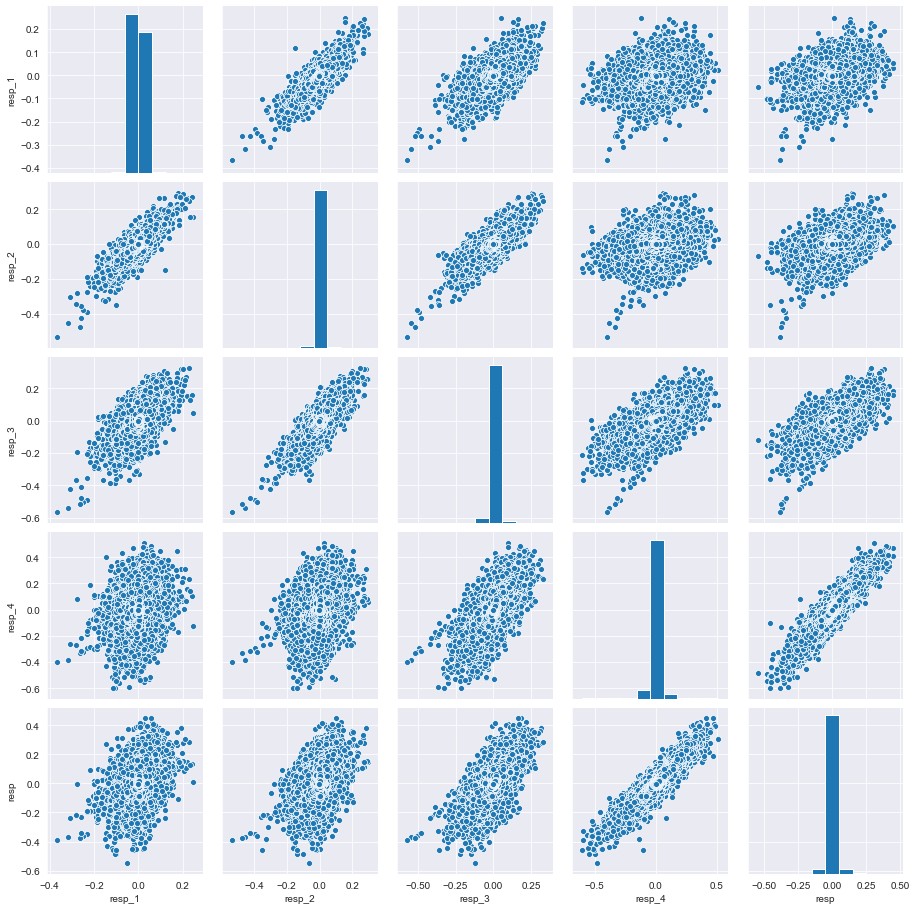

In [23]:
sns.pairplot(df[['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']]);

In [24]:
df.date.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

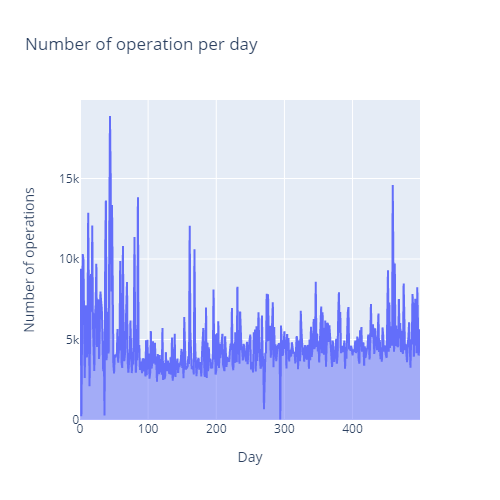

In [75]:
fig = px.area(data_frame= df.groupby('date')[['resp']].count(),width=1000,title='Number of operation per day')
fig.update_traces( showlegend = False)
fig.layout.xaxis.title = 'Day' 
fig.layout.yaxis.title = 'Number of operations'
fig.show()

In [55]:
date_df = df.groupby('date')[['resp']].mean()
std20 = []
for i in range(len(date_df)):
    if i <20:
        std20.append(np.nan)
    else:
        moving_std = date_df['resp'][i-20:i].std()
        std20.append(moving_std)
date_df['moving_std'] = std20
date_df.head(42)

resp  moving_std
date                      
0     0.002285         NaN
1    -0.001195         NaN
2     0.000766         NaN
3    -0.001403         NaN
4     0.000334         NaN
5     0.005816         NaN
6     0.001905         NaN
7    -0.001670         NaN
8     0.000661         NaN
9     0.003416         NaN
10    0.002072         NaN
11    0.001228         NaN
12    0.001561         NaN
13   -0.000304         NaN
14    0.001141         NaN
15   -0.000340         NaN
16   -0.000073         NaN
17    0.001181         NaN
18    0.000224         NaN
19    0.008935         NaN
20    0.000907    0.002487
21    0.000272    0.002478
22   -0.003768    0.002422
23    0.000242    0.002677
24    0.001997    0.002620
25    0.001857    0.002618
26   -0.002686    0.002397
27    0.005098    0.002529
28    0.000491    0.002626
29    0.000301    0.002628
30   -0.001974    0.002580
31    0.001091    0.002651
32    0.003158    0.002650
33    0.004091    0.002697
34   -0.000321    0.002773
35    0.000325    0.002791
36    0.001798    0.002778
37   -0.001076    0.002769
38    0.000917    0.002814
39    0.011139    0.002807
40   -0.000418    0.003154
41    0.000273    0.003174

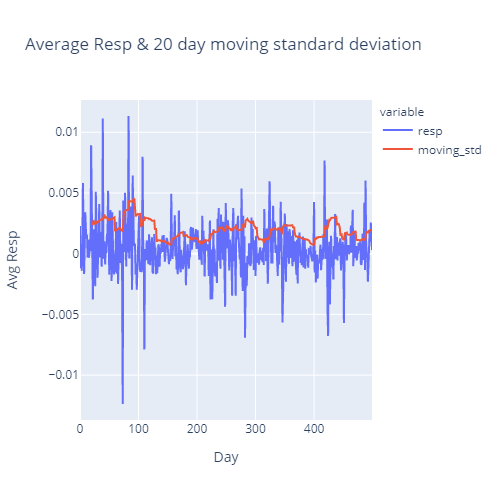

In [76]:
fig = px.line(data_frame=date_df,y=['resp','moving_std'], width=1000,title='Average Resp & 20 day moving standard deviation')
fig.layout.xaxis.title = 'Day' 
fig.layout.yaxis.title = 'Avg Resp'
fig.show()

In [77]:
df.weight[df.weight !=0].describe()

count    1.981287e+06
mean     3.657652e+00
std      8.291001e+00
min      6.912442e-03
25%      3.786683e-01
50%      1.072844e+00
75%      3.196557e+00
max      1.672937e+02
Name: weight, dtype: float64

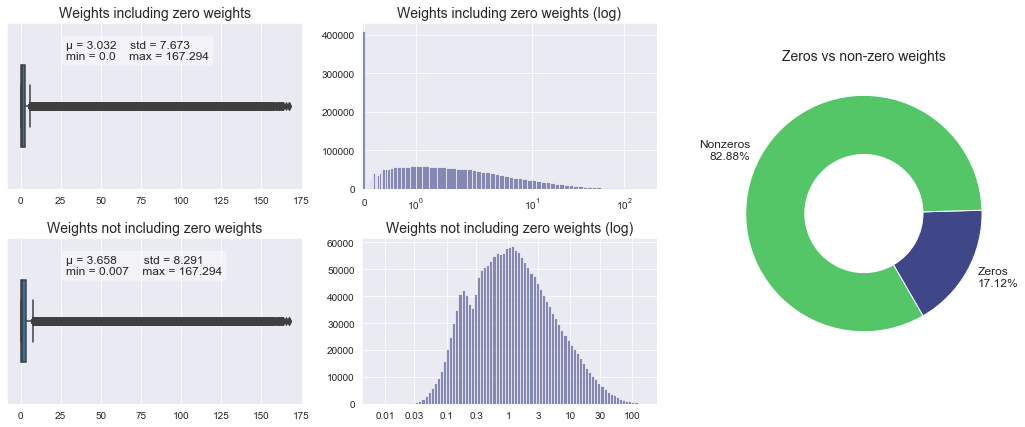

In [78]:
fig = plt.figure(figsize=(18,7))
grid =  gridspec.GridSpec(2,3,figure=fig,hspace=.3,wspace=.2)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 0])
ax4 = fig.add_subplot(grid[1, 1])
ax5 = fig.add_subplot(grid[:, 2])
sns.boxplot(x = df.weight,width=.5,ax=ax1)
ax2.hist(df.weight, color='#404788ff',alpha=.6, bins= list([-.05] + list(10**np.arange(-2,2.24,.05))))
ax2.set_xscale('symlog')
ax2.set_xlim(-.05,227)
sns.boxplot(x = df.weight[df.weight != 0],width=.5,ax=ax3)
ax1.set_title('Weights including zero weights',fontsize=14)
ax3.set_title('Weights not including zero weights',fontsize=14)
ax2.set_title('Weights including zero weights (log)',fontsize=14)
ax4.set_title('Weights not including zero weights (log)',fontsize=14)
props = dict(boxstyle='round', facecolor='white', alpha=0.4)
ax1.text(.2,.9,'μ = {}    std = {}\nmin = {}    max = {}'.format(round(df.weight.mean(),3),round(df.weight.std(),3),round(df.weight.min(),3),round(df.weight.max(),3)),
         transform=ax1.transAxes, verticalalignment='top',bbox=props,fontsize=12)
ax3.text(.2,.9,'μ = {}        std = {}\nmin = {}    max = {}'.format(round(df.weight[df.weight != 0].mean(),3),round(df.weight[df.weight != 0].std(),3),
                                                              round(df.weight[df.weight != 0].min(),3),round(df.weight[df.weight != 0].max(),3)),
         transform=ax3.transAxes, verticalalignment='top',bbox=props,fontsize=12)
ax4.hist(df.weight[df.weight !=0],color='#404788ff',alpha=.6,bins=10**np.arange(-2.16,2.24,.05))
ax4.set_xscale('log')
ax4.set_xticks((.01,.03,.1,.3,1,3,10,30,100))
ax4.set_xticklabels((.01,.03,.1,.3,1,3,10,30,100))
ax5.pie(((df.weight==0).mean(),(1-(df.weight==0).mean())),startangle=300,wedgeprops=dict(width=0.5),
        labels=('Zeros\n{}%'.format(round((df.weight==0).mean()*100,2)),'Nonzeros\n{}%'.format(round((1-(df.weight==0).mean())*100,2))),
        textprops={'fontsize': 12},colors=['#404788ff','#55c667ff'])
ax5.set_title('Zeros vs non-zero weights',fontsize=14)
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax2.set_ylabel('')
ax5.set_ylabel('')
ax4.set_xlabel('');

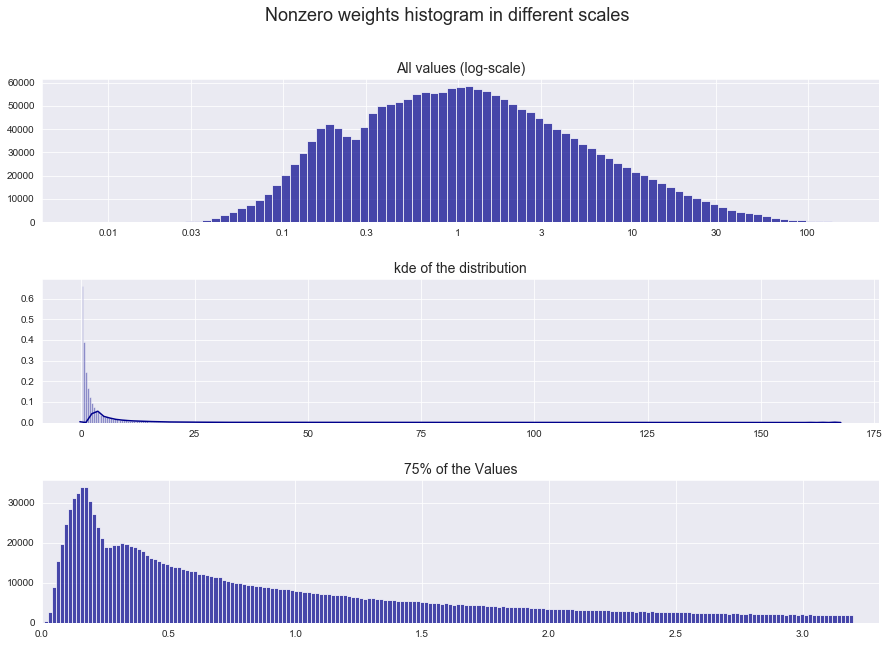

In [79]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Nonzero weights histogram in different scales',fontsize=18)
ax1 = plt.subplot(3,1,1)
ax1.hist(df.weight[df.weight !=0],color='darkblue',alpha=.7, bins=10**np.arange(-2.16,2.23,.05))
plt.xscale('log')
plt.xticks((.01,.03,.1,.3,1,3,10,30,100),(.01,.03,.1,.3,1,3,10,30,100))
ax2 = plt.subplot(3,1,2)
sns.distplot(df.weight[df.weight != 0], color='darkblue', bins=400, ax=ax2) 
ax3 = plt.subplot(3,1,3)
ax3.hist(df.weight[(df.weight !=0) & (df.weight < 3.197 )],color='darkblue',alpha=.7, bins=200)
ax3.set_xlim(0,3.3)
ax2.set_xlabel('') 
ax1.set_title('All values (log-scale)',fontsize=14)
ax2.set_title('kde of the distribution',fontsize=14)
ax3.set_title('75% of the Values',fontsize=14)
plt.subplots_adjust(hspace=.4);

In [80]:
df_f =  pd.read_csv('C:/Users/Ikmal Syafiq/Downloads/jane-street-market-prediction/features.csv')
df_f.head(5)

feature  tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  \
0  feature_0  False  False  False  False  False  False  False  False  False   
1  feature_1  False  False  False  False  False  False   True   True  False   
2  feature_2  False  False  False  False  False  False   True   True  False   
3  feature_3  False  False  False  False  False  False   True  False   True   
4  feature_4  False  False  False  False  False  False   True  False   True   

   tag_9  tag_10  tag_11  tag_12  tag_13  tag_14  tag_15  tag_16  tag_17  \
0  False   False   False   False   False   False   False   False   False   
1  False   False   False   False   False   False   False   False   False   
2   True   False   False   False   False   False   False   False   False   
3  False   False   False   False   False   False   False   False   False   
4   True   False   False   False   False   False   False   False   False   

   tag_18  tag_19  tag_20  tag_21  tag_22  tag_23  tag_24  tag_25  tag_26  \
0   False   False   False   False   False   False   False   False   False   
1   False   False   False   False   False   False   False   False   False   
2   False   False   False   False   False   False   False   False   False   
3   False   False   False   False   False   False   False   False   False   
4   False   False   False   False   False   False   False   False   False   

   tag_27  tag_28  
0   False   False  
1   False   False  
2   False   False  
3   False   False  
4   False   False

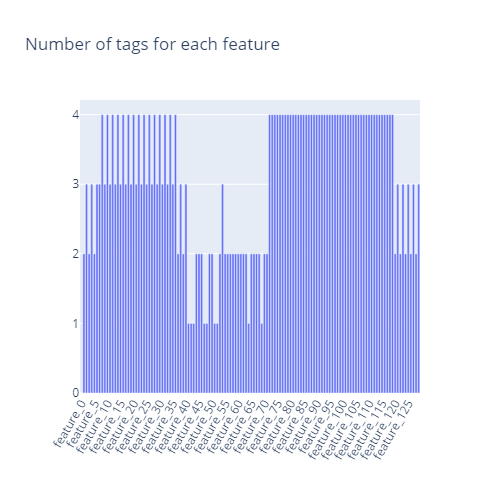

In [81]:
fig = px.bar(df_f.set_index('feature').T.sum(), width=1000, title='Number of tags for each feature')
fig.layout.xaxis.tickangle = 300
fig.update_traces( showlegend = False)
fig.layout.xaxis. dtick = 5
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.show()

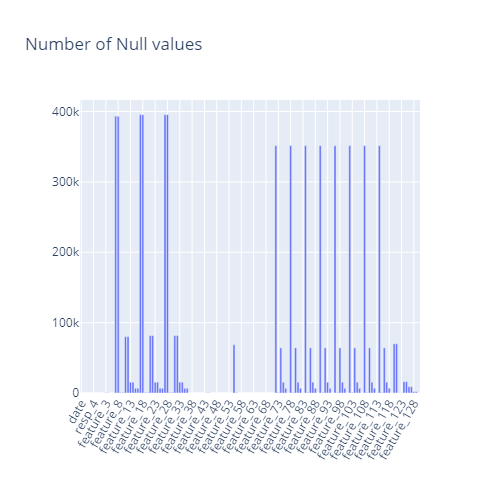

In [82]:
fig = px.bar(x = df.isnull().sum().index,y= df.isnull().sum().values, height= 500,width= 1000,title= 'Number of Null values')
fig.layout.xaxis.tickangle = 300
fig.layout.xaxis. dtick = 5
fig.layout.yaxis. dtick = 100000
fig.layout.xaxis.title = ''
fig.layout.yaxis.title = ''
fig.layout.xaxis.showgrid = True
fig.show()

In [83]:
0.1 * len(df)

239049.1

In [84]:
nulls = df.isnull().sum()
nulls_list = list(nulls[(nulls >239049)].index)
nulls_list

['feature_7',
 'feature_8',
 'feature_17',
 'feature_18',
 'feature_27',
 'feature_28',
 'feature_72',
 'feature_78',
 'feature_84',
 'feature_90',
 'feature_96',
 'feature_102',
 'feature_108',
 'feature_114']

In [86]:
nulls

date              0
weight            0
resp_1            0
resp_2            0
resp_3            0
               ... 
feature_126    8853
feature_127    8853
feature_128    1921
feature_129    1921
ts_id             0
Length: 138, dtype: int64

In [85]:
df[nulls_list].corr().style.background_gradient(cmap='viridis')

In [87]:
df.drop(columns=nulls_list,inplace=True)

In [88]:
(df.iloc[:,7:-2].std() / df.iloc[:,7:-2].mean()).head(5)

feature_0    101.635945
feature_1      6.637764
feature_2      6.925977
feature_3    217.434315
feature_4    421.949150
dtype: float64

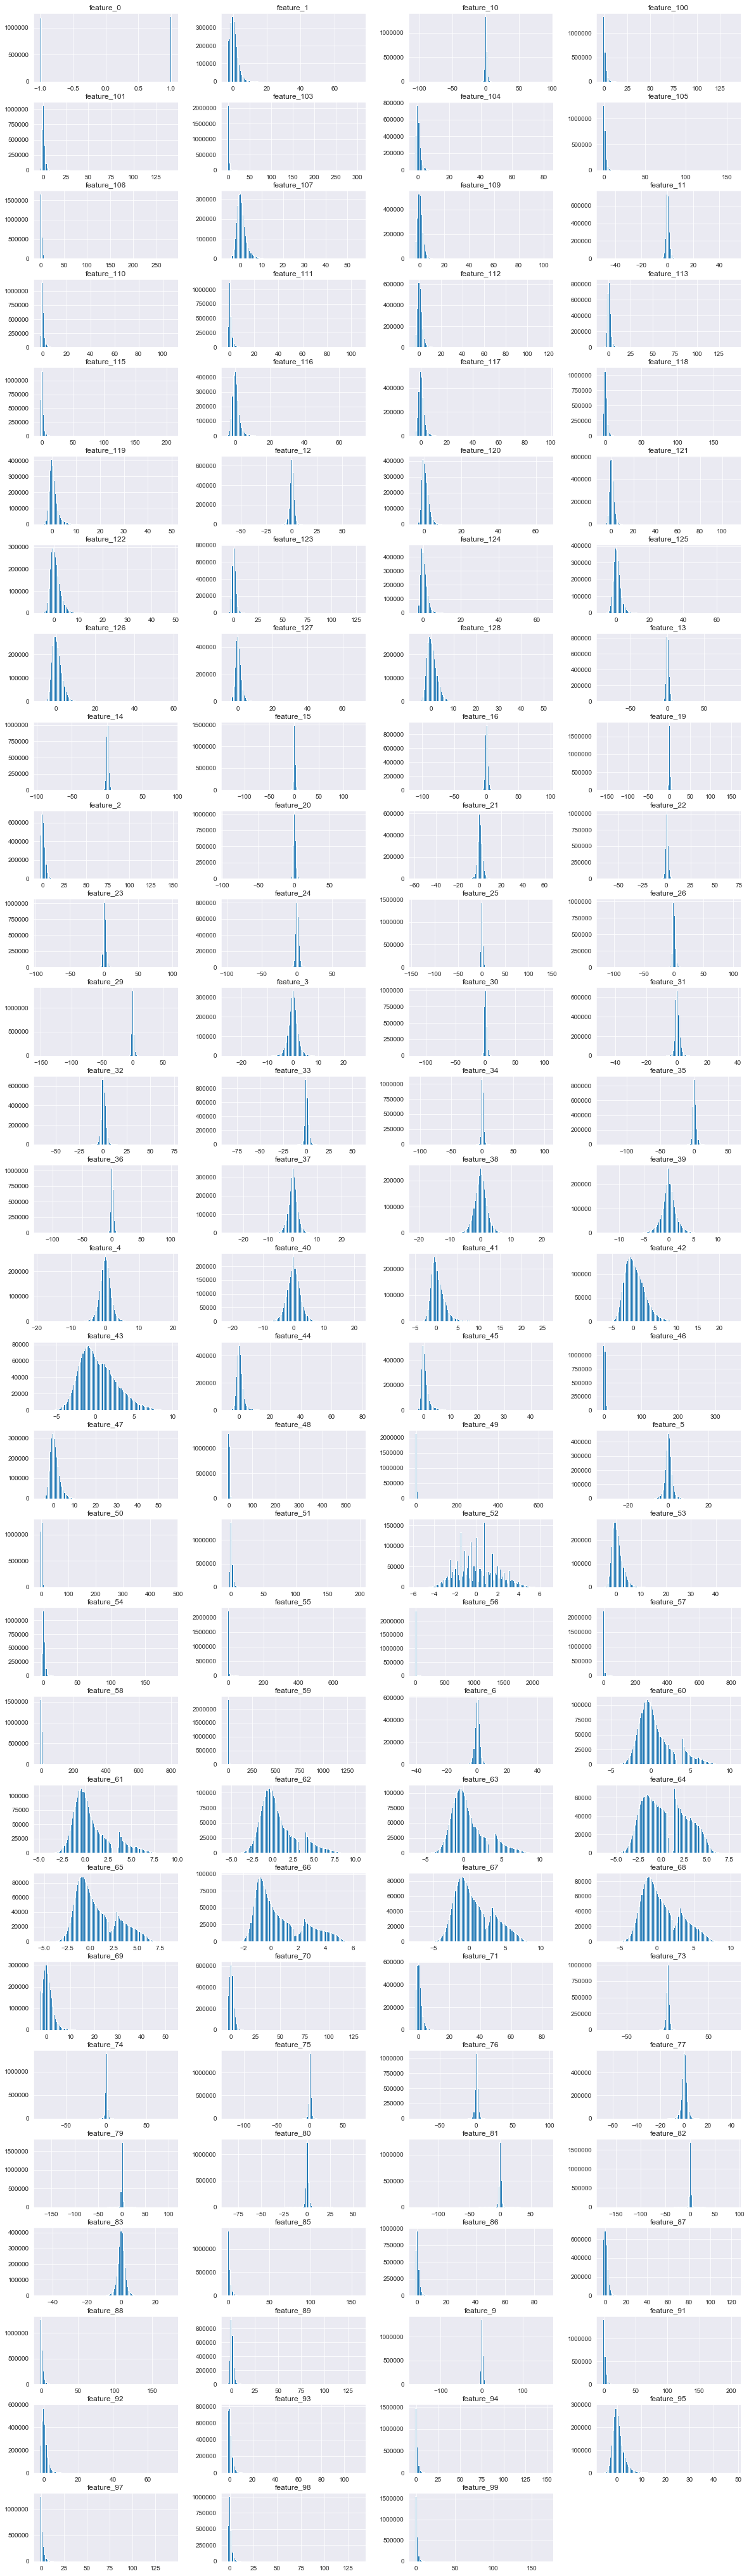

In [89]:
df.iloc[:,7:-2].hist(bins=100,figsize=(20,74),layout=(29,4));

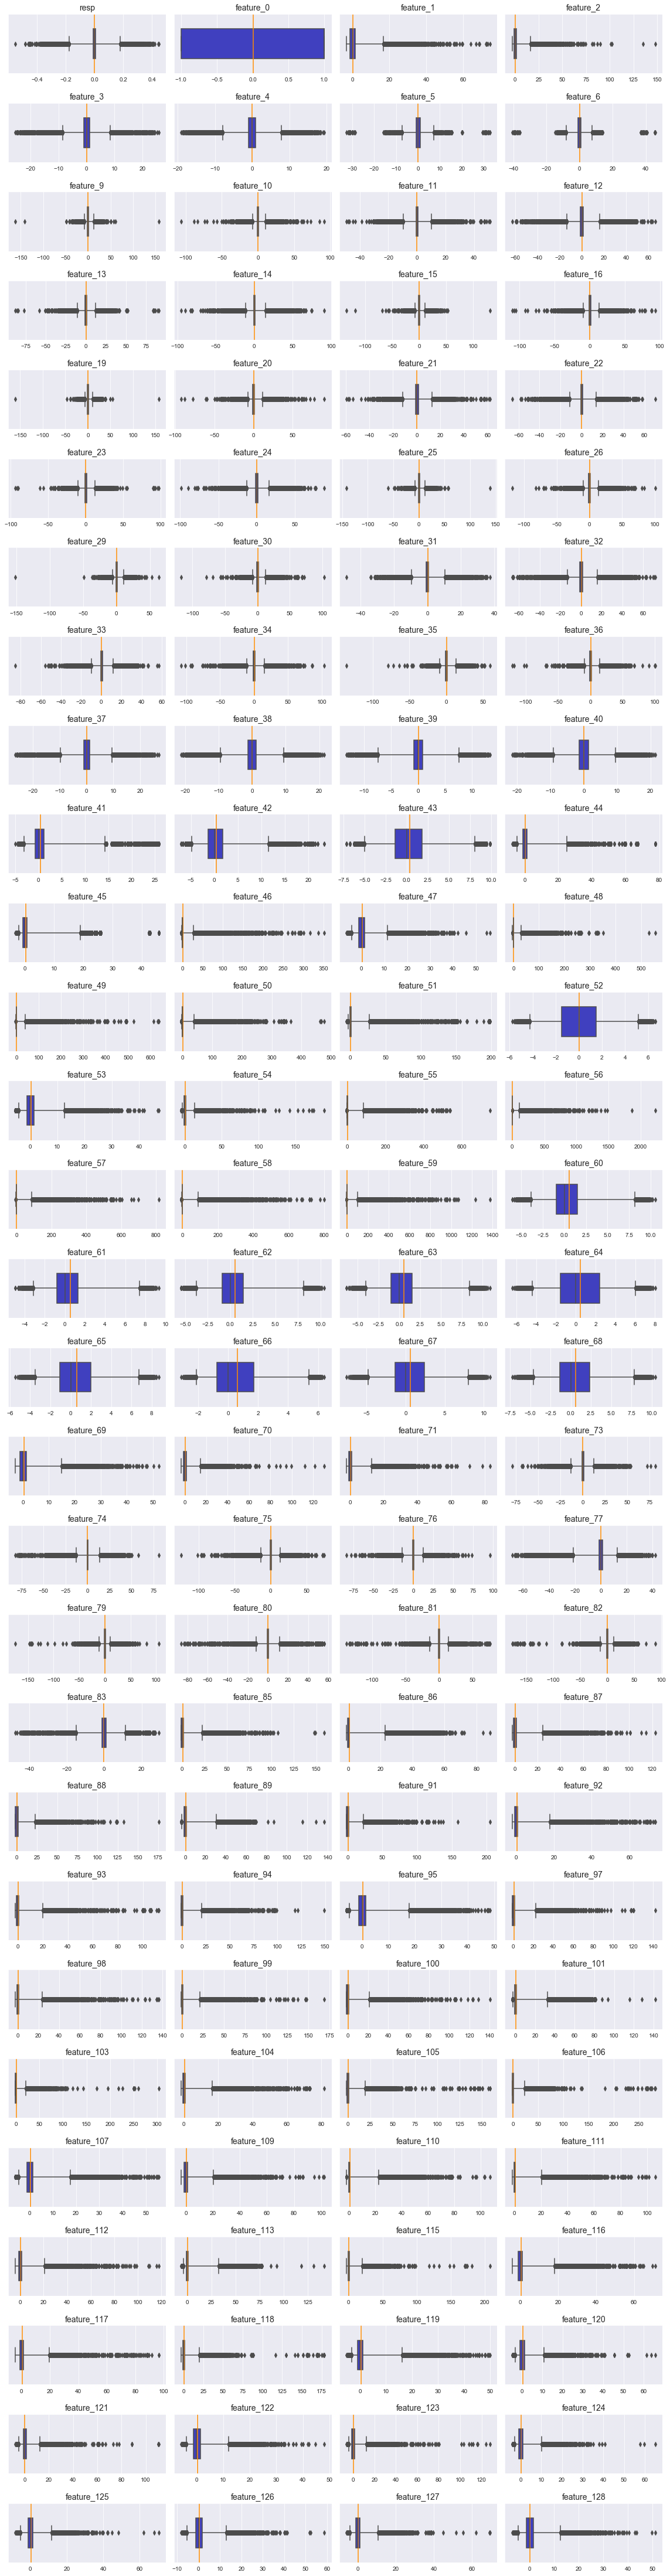

In [109]:
fig = plt.figure(figsize=(20,80))
grid =  gridspec.GridSpec(29,4,figure=fig,hspace=.5,wspace=.05)
featstr = [i for i in df.columns[6:-2]]
counter = 0
for i in range(29):
    for j in range(4):
        subf = fig.add_subplot(grid[i, j]);
        sns.boxplot(x= df[featstr[counter]],saturation=.5,color= 'blue', ax= subf,width=.5,whis=(.1,99.9));
        subf.axvline(df[featstr[counter]].mean(),color= 'darkorange')
        subf.set_xlabel('')
        subf.set_title('{}'.format(featstr[counter]),fontsize=14)
        counter += 1
        gc.collect();

In [94]:
df.mean().reset_index().T

0        1            2            3            4           5  \
index     date   weight       resp_1       resp_2       resp_3      resp_4   
0      247.867  3.03154  0.000143497  0.000198075  0.000282418  0.00043502   

                 6           7          8          9          10          11  \
index         resp   feature_0  feature_1  feature_2   feature_3   feature_4   
0      0.000408311  0.00983856   0.385578   0.357687  0.00891917  0.00415006   

               12         13         14          15          16          17  \
index   feature_5  feature_6  feature_9  feature_10  feature_11  feature_12   
0     -0.00371462 -0.0125892   0.248813    0.182349   0.0891216   0.0494855   

               18          19          20          21          22          23  \
index  feature_13  feature_14  feature_15  feature_16  feature_19  feature_20   
0        0.143105   0.0890272    0.211678    0.146301    0.293815    0.268768   

               24          25          26          27          28          29  \
index  feature_21  feature_22  feature_23  feature_24  feature_25  feature_26   
0        0.186911    0.176979    0.252441    0.238561    0.294071    0.273178   

               30          31          32          33          34          35  \
index  feature_29  feature_30  feature_31  feature_32  feature_33  feature_34   
0        0.321892    0.342534     0.22056    0.250131    0.308222    0.335353   

               36          37          38          39          40          41  \
index  feature_35  feature_36  feature_37  feature_38  feature_39  feature_40   
0        0.341453    0.365825   0.0293205   0.0228918   0.0400216   0.0507497   

               42          43          44          45          46          47  \
index  feature_41  feature_42  feature_43  feature_44  feature_45  feature_46   
0        0.445054    0.360184    0.346029    0.411531    0.438031    0.476116   

               48          49          50          51          52          53  \
index  feature_47  feature_48  feature_49  feature_50  feature_51  feature_52   
0        0.347867    0.499631    0.564001     0.51226    0.457387   0.0457438   

               54          55          56          57          58          59  \
index  feature_53  feature_54  feature_55  feature_56  feature_57  feature_58   
0          0.3627     0.35887    0.652597    0.804946     0.66135    0.679812   

               60          61          62          63          64          65  \
index  feature_59  feature_60  feature_61  feature_62  feature_63  feature_64   
0         0.76259    0.556396    0.558165    0.545541    0.546778    0.435059   

               66          67          68          69          70          71  \
index  feature_65  feature_66  feature_67  feature_68  feature_69  feature_70   
0        0.607565    0.608504    0.595195    0.595942    0.369541    0.243371   

               72          73           74          75          76  \
index  feature_71  feature_73   feature_74  feature_75  feature_76   
0        0.332274  -0.0328677 -0.000204454  -0.0190919  -0.0318983   

               77          78          79          80          81          82  \
index  feature_77  feature_79  feature_80  feature_81  feature_82  feature_83   
0         -0.0768  -0.0354346 -0.00209946  -0.0144183  -0.0346151  -0.0800853   

               83          84          85          86          87          88  \
index  feature_85  feature_86  feature_87  feature_88  feature_89  feature_91   
0        0.557824    0.402404    0.444451    0.514095    0.400516    0.520512   

               89          90          91          92          93          94  \
index  feature_92  feature_93  feature_94  feature_95  feature_97  feature_98   
0        0.405081     0.40883    0.428894    0.417632    0.559095    0.407107   

               95           96           97           98           99  \
index  feature_99  feature_100  feature_101  feature_103  feature_104   
0        0.436

In [95]:
df.fillna(df.mean(axis=0),inplace=True)

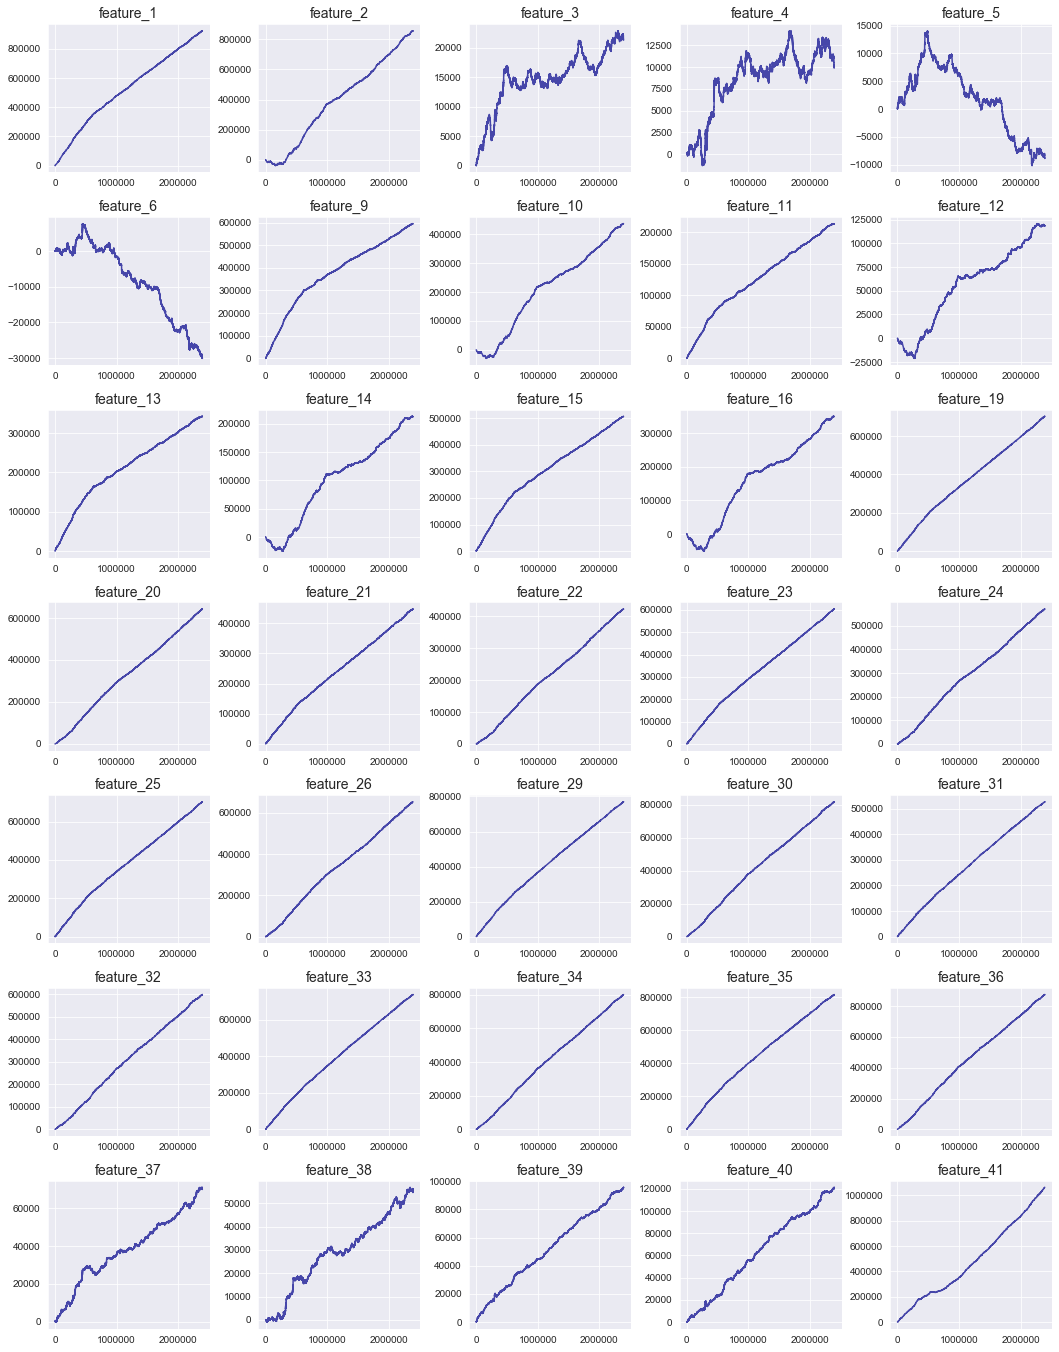

In [99]:
fig = plt.figure(figsize=(18,24))
grid =  gridspec.GridSpec(7,5,figure=fig,hspace=.3,wspace=.3)
counter = 0
f = featstr[1:36]
for i in range(7):
    for j in range(5):
        subf = fig.add_subplot(grid[i, j]);
        cumsum = df[f[counter]].cumsum()
        subf.plot(cumsum,color= 'darkblue', alpha=.7);
        subf.set_xlabel('')
        subf.set_ylabel('')
        subf.set_title('{}'.format(f[counter]),fontsize=14)
        counter += 1
        del cumsum
        gc.collect();

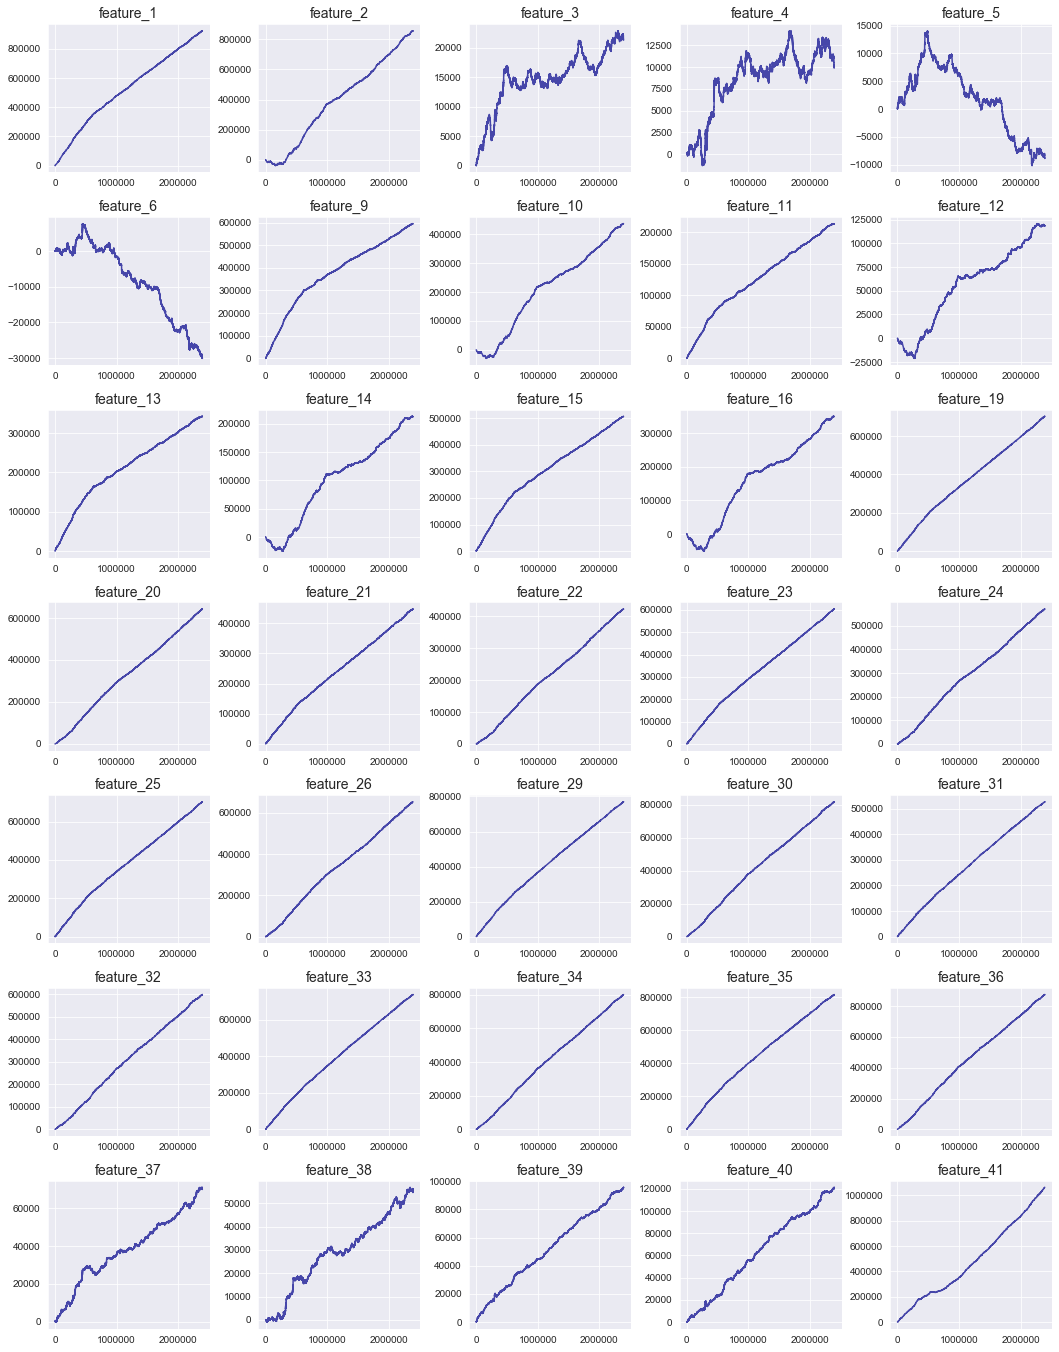

In [100]:
fig = plt.figure(figsize=(18,24))
grid =  gridspec.GridSpec(7,5,figure=fig,hspace=.3,wspace=.3)
counter = 0
f = featstr[1:36]
for i in range(7):
    for j in range(5):
        subf = fig.add_subplot(grid[i, j]);
        cumsum = df[f[counter]].cumsum()
        subf.plot(cumsum,color= 'darkblue', alpha=.7);
        subf.set_xlabel('')
        subf.set_ylabel('')
        subf.set_title('{}'.format(f[counter]),fontsize=14)
        counter += 1
        del cumsum
        gc.collect();

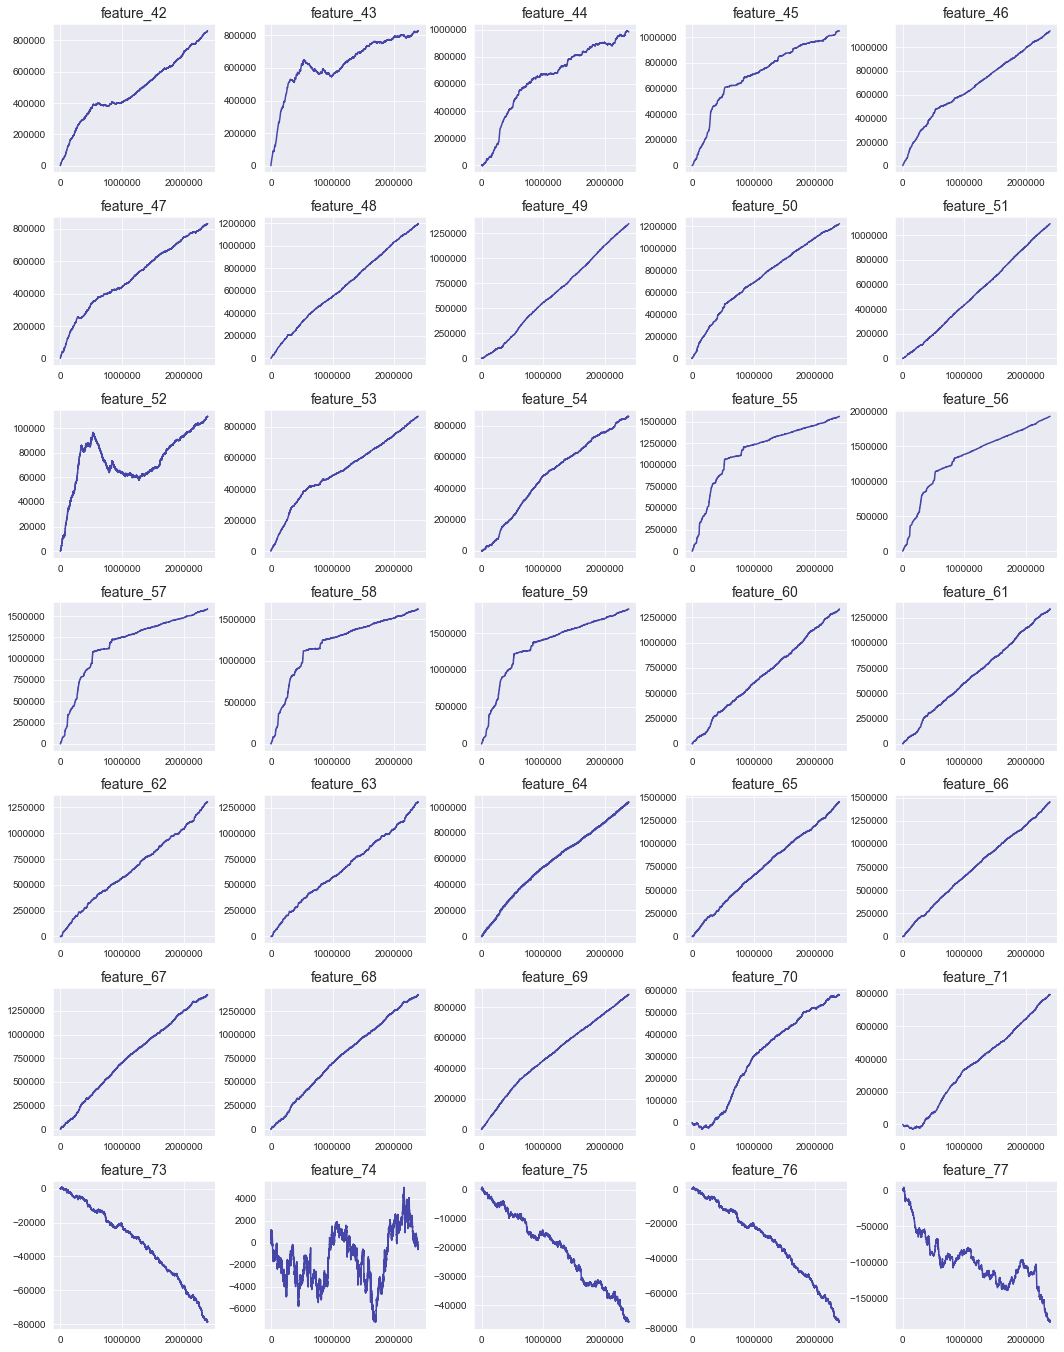

In [101]:
fig = plt.figure(figsize=(18,24))
grid =  gridspec.GridSpec(7,5,figure=fig,hspace=.3,wspace=.3)
counter = 0
f = featstr[36:71]
for i in range(7):
    for j in range(5):
        subf = fig.add_subplot(grid[i, j]);
        cumsum = df[f[counter]].cumsum()
        subf.plot(cumsum,color= 'darkblue', alpha=.7);
        subf.set_xlabel('')
        subf.set_ylabel('')
        subf.set_title('{}'.format(f[counter]),fontsize=14)
        counter += 1
        del cumsum
        gc.collect();

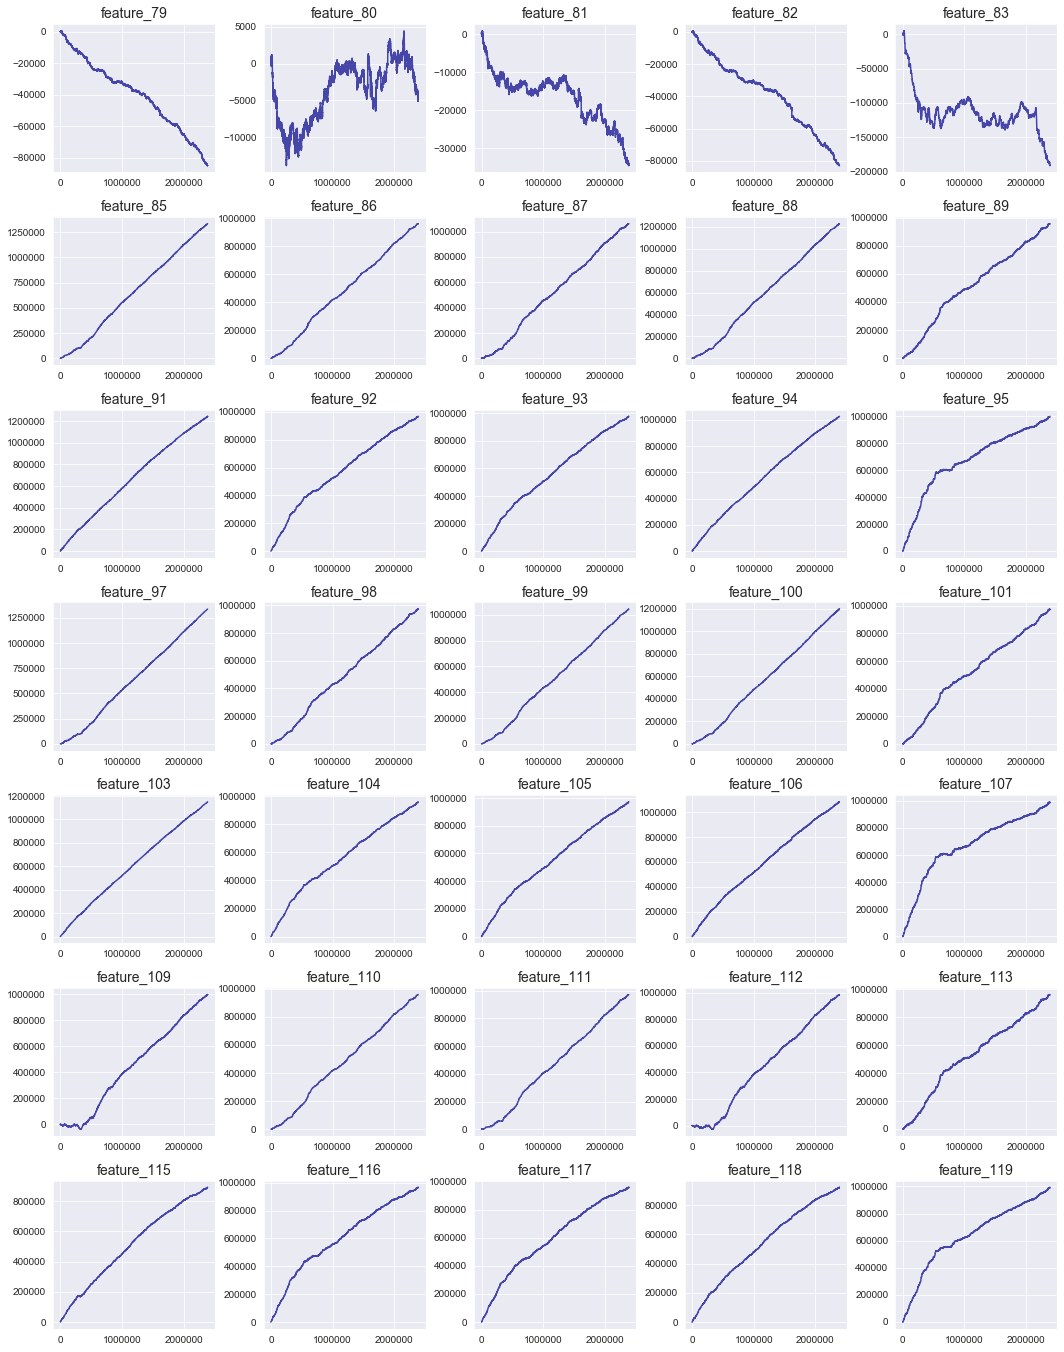

In [102]:
fig = plt.figure(figsize=(18,24))
grid =  gridspec.GridSpec(7,5,figure=fig,hspace=.3,wspace=.3)
counter = 0
f = featstr[71:106]
for i in range(7):
    for j in range(5):
        subf = fig.add_subplot(grid[i, j]);
        cumsum = df[f[counter]].cumsum()
        subf.plot(cumsum,color= 'darkblue', alpha=.7);
        subf.set_xlabel('')
        subf.set_ylabel('')
        subf.set_title('{}'.format(f[counter]),fontsize=14)
        counter += 1
        del cumsum
        gc.collect();

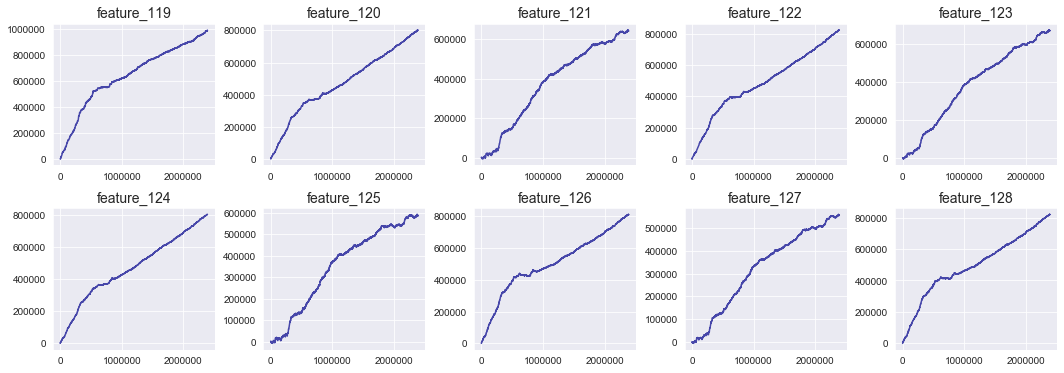

In [108]:
fig = plt.figure(figsize=(18,6))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.3,wspace=.3)
counter = 0
f = featstr[105:]
for i in range(2):
    for j in range(5):
        subf = fig.add_subplot(grid[i, j]);
        cumsum = df[f[counter]].cumsum()
        subf.plot(cumsum,color= 'darkblue', alpha=.7);
        subf.set_xlabel('')
        subf.set_ylabel('')
        subf.set_title('{}'.format(f[counter]),fontsize=14)
        counter += 1
        del cumsum
        gc.collect();

In [110]:
corr = df.iloc[:,7:-2].corr()

In [111]:
corr.style.background_gradient(cmap='coolwarm')

In [112]:
featstr2 = [ i for i in featstr if i not in ['feature_41','feature_64']]
len(featstr)

116

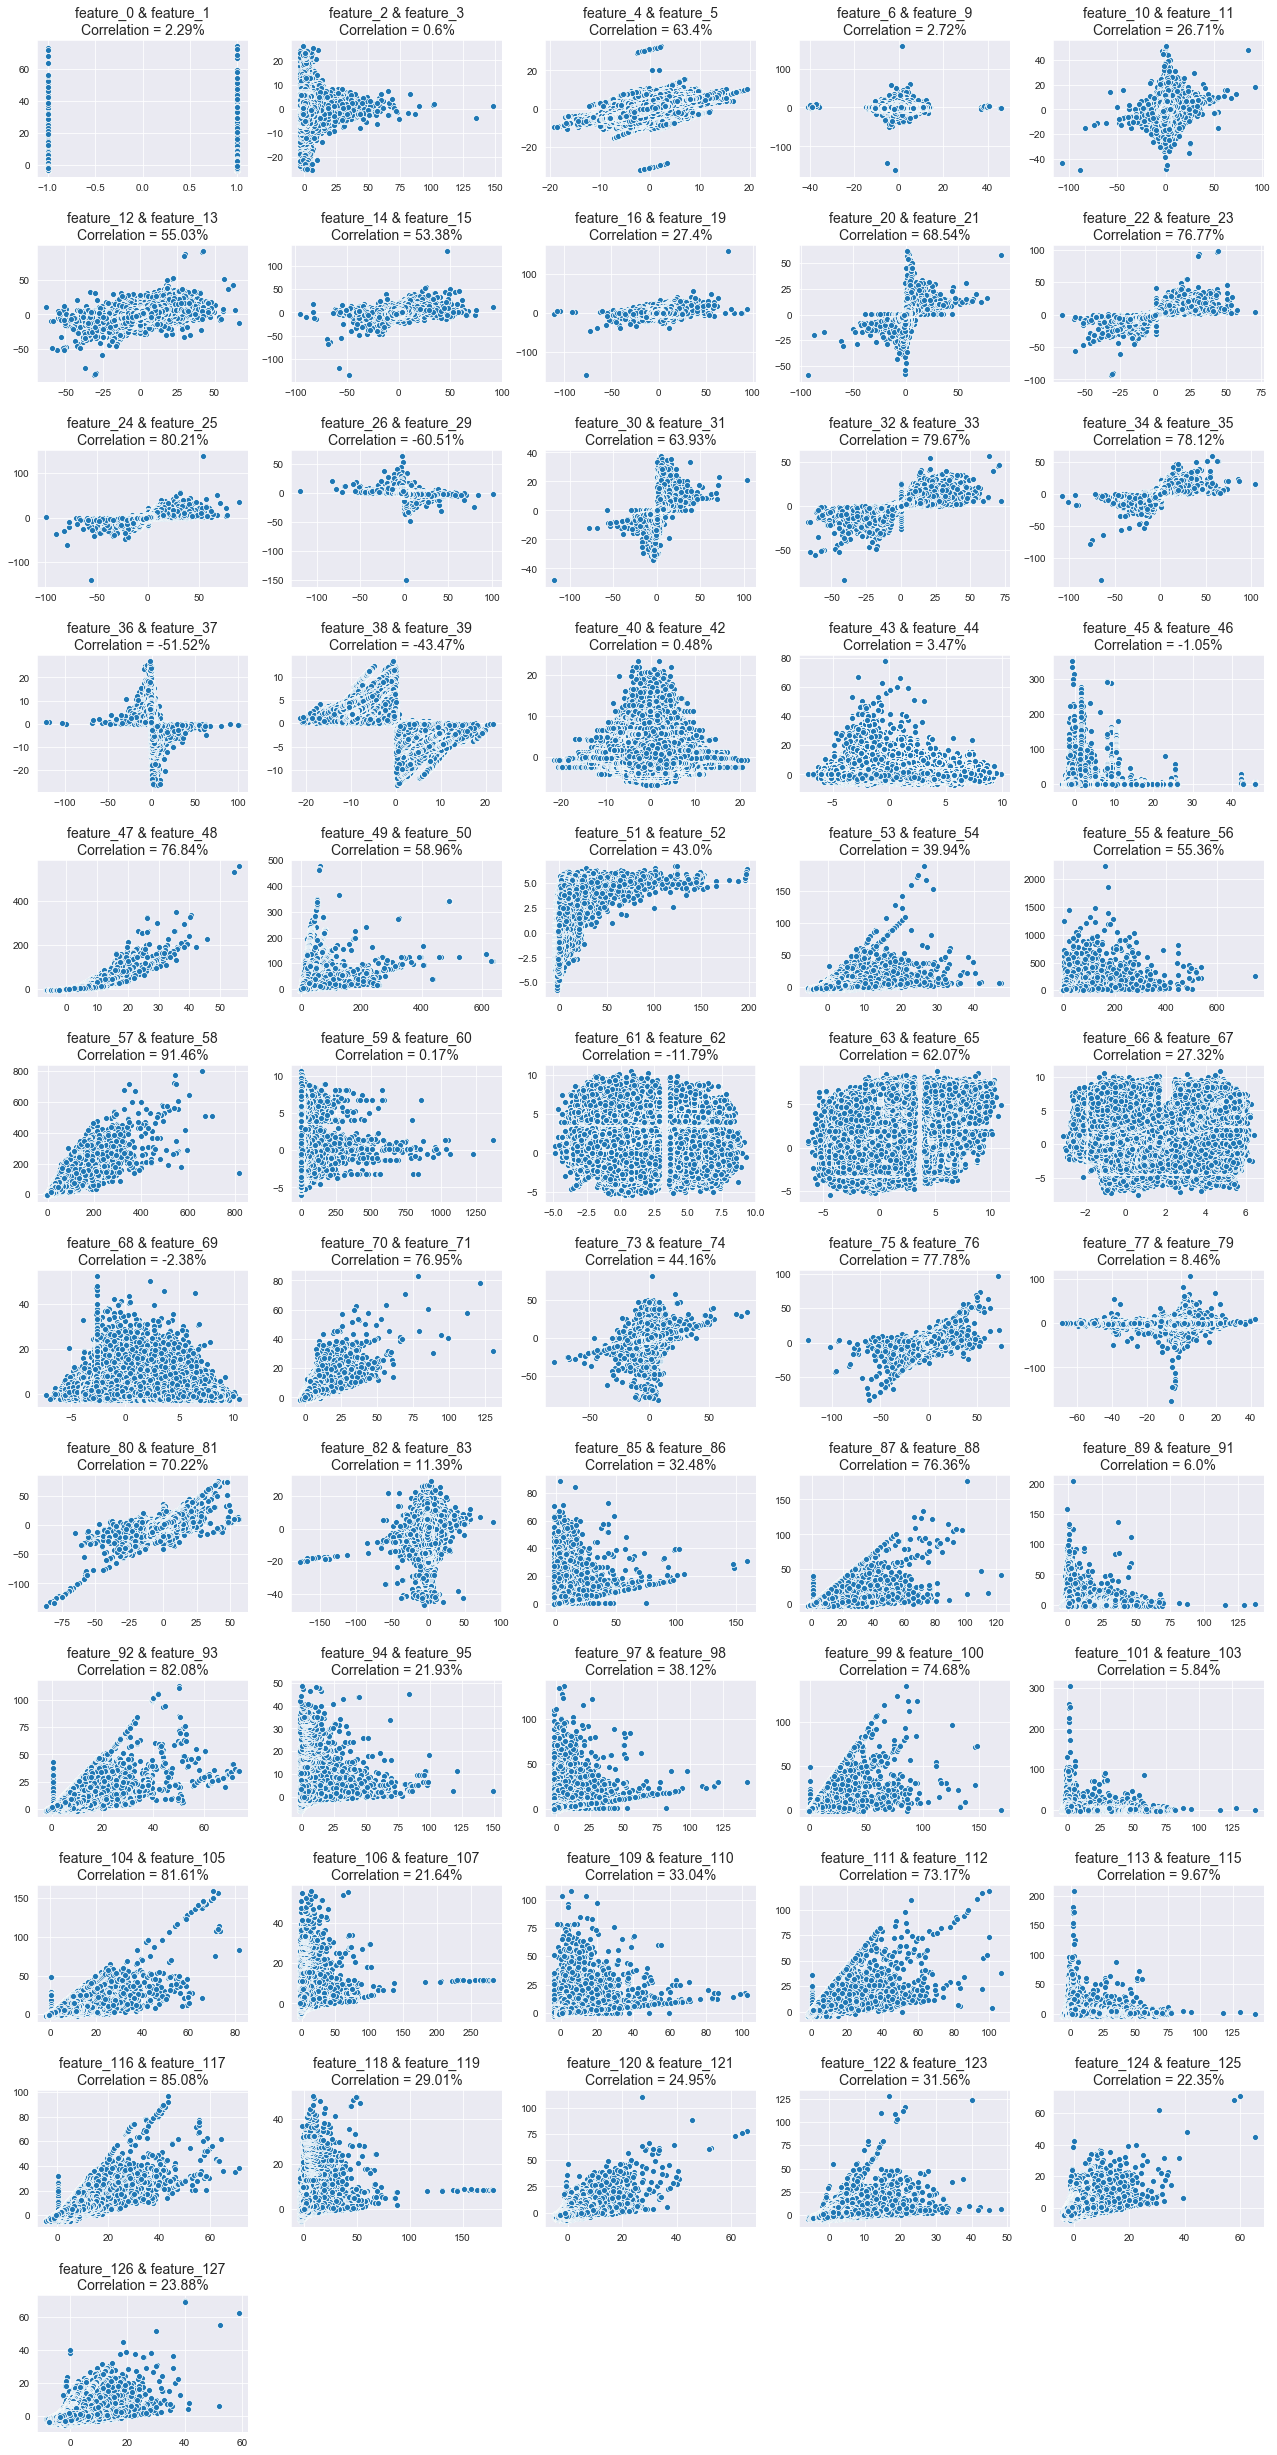

In [113]:
fig = plt.figure(figsize=(22,44))
grid =  gridspec.GridSpec(12,5,figure=fig,hspace=.5,wspace=.2)
counter = 1
for i in range(12):
    for j in range(5):
        if counter == 113:
            break
        subf = fig.add_subplot(grid[i, j]);
        sns.scatterplot(x= df[featstr2[counter]], y = df[featstr2[counter+1]], ax= subf);
        cor = round(df[featstr2[counter]].corr(df[featstr2[counter+1]]) * 100,2)
        subf.set_xlabel('')
        subf.set_ylabel('')
        subf.set_title('{} & {}\nCorrelation = {}%'.format(featstr2[counter],featstr2[counter+1],cor),fontsize=14)
        counter += 2
        gc.collect();